In [407]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [408]:
import os
path_to_data = os.path.join(os.getcwd(), '..', 'data', 'data.txt')
path_to_centralized_data = os.path.join(os.getcwd(), '..', 'data', 'data_centralized.txt')
output_path = os.path.join(os.getcwd(), '.', 'output')


In [409]:
# Create output directory if it does not exist
if not os.path.exists(output_path):
    os.makedirs(output_path)


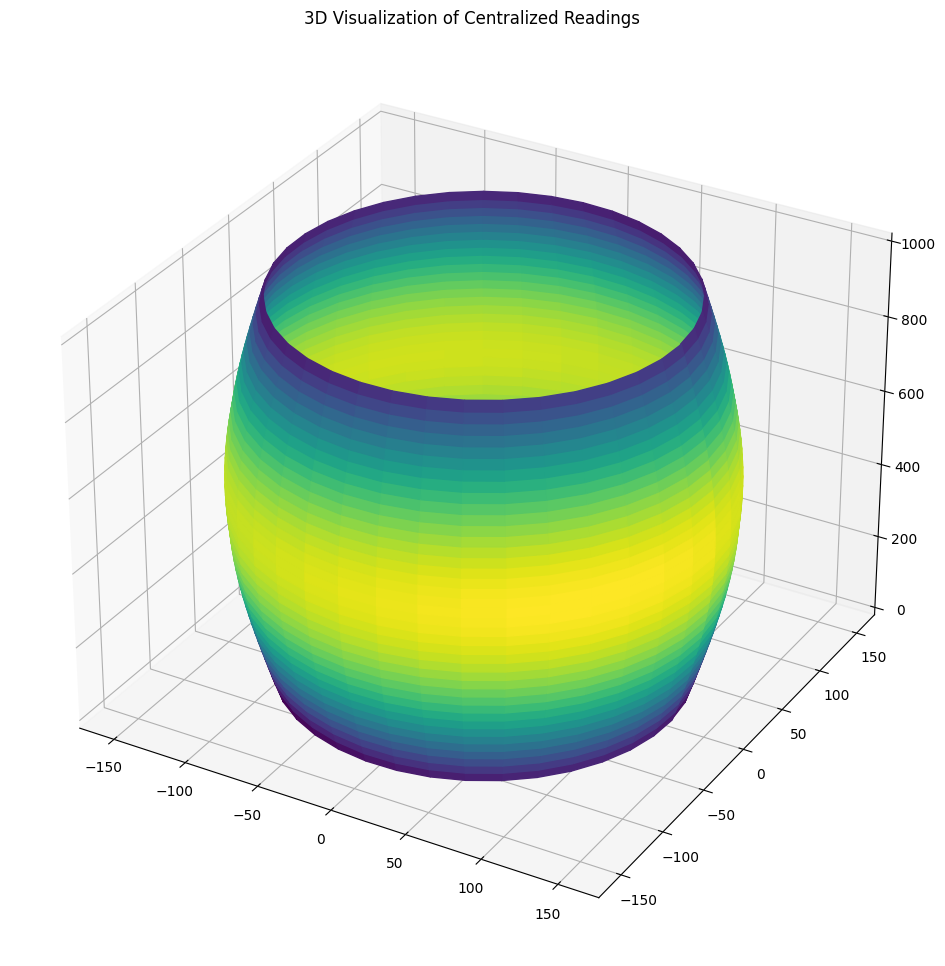

In [410]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Load the first data file
data_centralized = np.loadtxt(path_to_centralized_data)

# Convert the data into a 3D cylindrical coordinate system
n_sensors = data_centralized.shape[1]
n_depths = data_centralized.shape[0]
theta = np.linspace(0, 2 * np.pi, n_sensors)  # evenly distributed angles around the pipe
z = np.arange(n_depths) * 5

# Create a grid of the theta and z values
theta_grid, z_grid = np.meshgrid(theta, z)

# Convert from cylindrical to Cartesian coordinates
x_centralized = data_centralized * np.cos(theta_grid)
y_centralized = data_centralized * np.sin(theta_grid)

# Compute the deviation from the expected radius
expected_radius = 127
radius_deviation = np.abs(data_centralized - expected_radius)
norm = plt.Normalize(radius_deviation.min(), radius_deviation.max())  # normalize deviation to [0, 1]

# Create the first plot
fig = plt.figure(figsize=(20, 12))

# Plot for the centralized data
ax_centralized = fig.add_subplot(111, projection='3d')

# Create a color map
colors = cm.viridis(norm(radius_deviation))

# Plot for the centralized data
surf_centralized = ax_centralized.plot_surface(
    x_centralized, y_centralized, z_grid, facecolors=colors, shade=False
)

# Set the axis labels for the centralized data
ax_centralized.set_title('3D Visualization of Centralized Readings')

# Save the plt
plt.savefig(os.path.join(output_path, '3d_visualization.png'))

# Display the plots
plt.show()



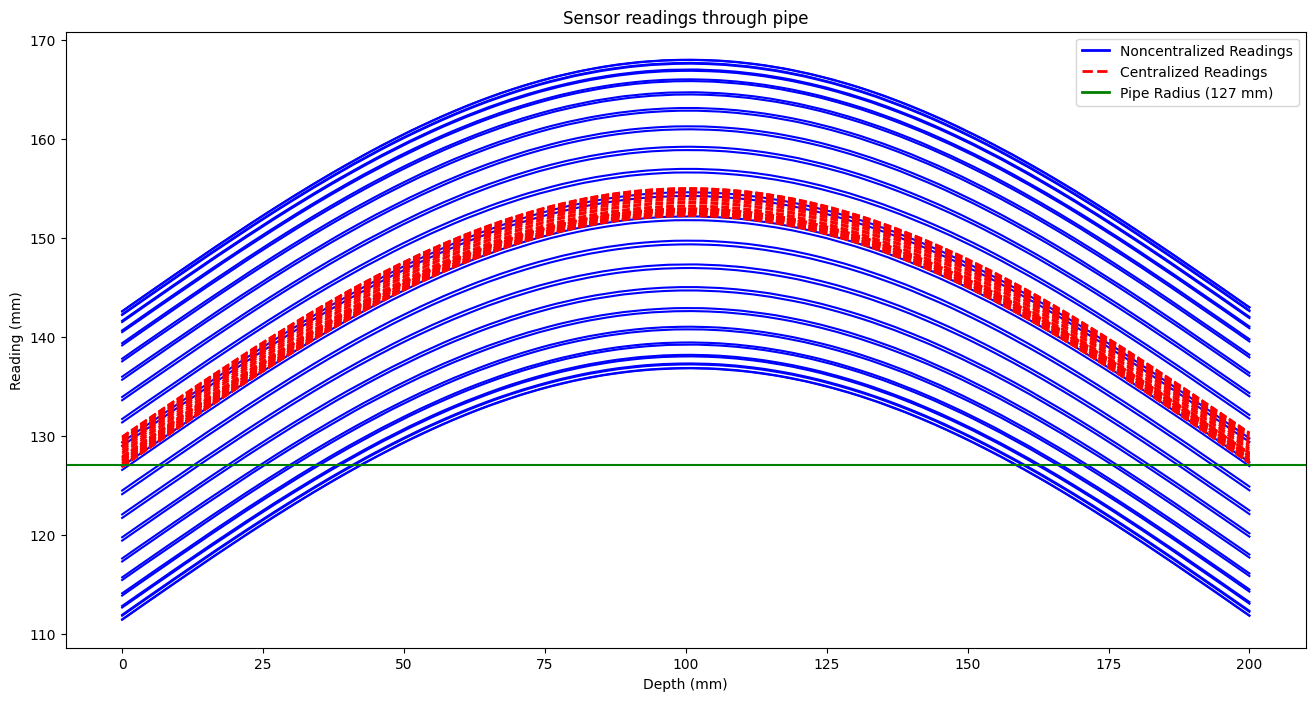

In [411]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming path_to_data and path_to_centralized_data are paths to your data files
data = np.loadtxt(path_to_data)
data_centralized = np.loadtxt(path_to_centralized_data)

# Convert to pandas DataFrame
df = pd.DataFrame(data)
df_centralized = pd.DataFrame(data_centralized)

# Prepare the figure
plt.figure(figsize=(16, 8))

# Plot noncentralized data
for column in df:
    plt.plot(df[column], color='b')

# Plot centralized data
for column in df_centralized:
    plt.plot(df_centralized[column], linestyle='--', color='r')

plt.xlabel('Depth (mm)')
plt.ylabel('Reading (mm)')
plt.title('Sensor readings through pipe')
plt.axhline(y=127, color='g', linestyle='-')

# Custom legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='b', lw=2),
                Line2D([0], [0], color='r', lw=2, linestyle='--'),
                Line2D([0], [0], color='g', lw=2)]
plt.legend(custom_lines, ['Noncentralized Readings', 'Centralized Readings', 'Pipe Radius (127 mm)'])


# Save the plt
plt.savefig(os.path.join(output_path, 'sensor_readings.png'))

plt.show()
